<a href="https://colab.research.google.com/github/rishi12jn/Predictive-analytics-Lab/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training set size: 79 samples
Validation set size: 40 samples
Testing set size: 30 samples
Iteration 0, Loss: 1.0685
Iteration 100, Loss: 0.2070
Iteration 200, Loss: 0.1848
Iteration 300, Loss: 0.1633
Iteration 400, Loss: 0.1456
Iteration 500, Loss: 0.1327
Iteration 600, Loss: 0.1241
Iteration 700, Loss: 0.1189
Iteration 800, Loss: 0.1159
Iteration 900, Loss: 0.1143
Validation Metrics:
Mean Absolute Error (MAE): 0.3615805904612995
Mean Squared Error (MSE): 0.19996036650926438
Root Mean Squared Error (RMSE): 0.4471692817147264

Testing Metrics:
Mean Absolute Error (MAE): 0.31096262236062494
Mean Squared Error (MSE): 0.13194546021521217
Root Mean Squared Error (RMSE): 0.3632429768284752


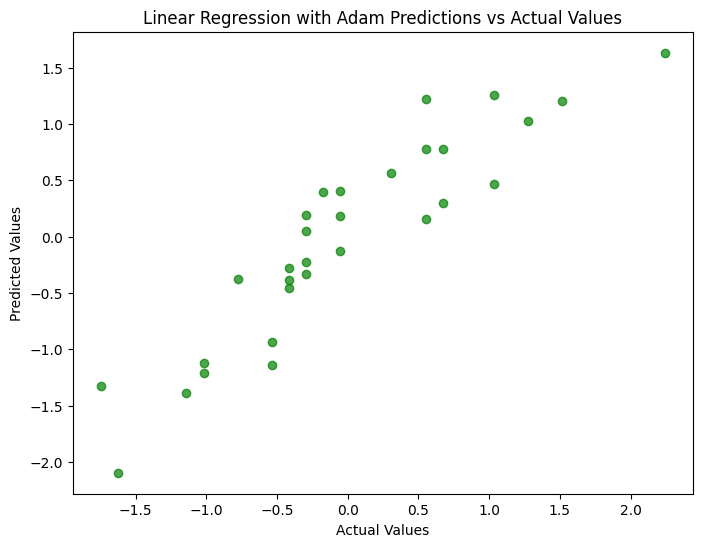

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split  # Ensure this is imported


# Load dataset into a pandas DataFrame
iris = load_iris(as_frame=True)
df = iris.data
df['species'] = iris.target

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(
    df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
)

# Separate features and target
X = df.drop(columns=['sepal length (cm)', 'species']).values  # Features
y = df['sepal length (cm)'].values.reshape(-1, 1)  # Target variable reshaped for matrix operations

# First split: 80% training+validation, 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Second split: 20% training, 10% validation from the training+validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=101)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Adam optimizer-based Linear Regression
class LinearRegressionWithAdam:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def initialize_params(self, n_features):
        self.weights = np.zeros((n_features, 1))  # Initialize weights to zeros
        self.bias = 0
        self.m_w, self.v_w = np.zeros_like(self.weights), np.zeros_like(self.weights)
        self.m_b, self.v_b = 0, 0
        self.t = 0  # Time step for bias correction

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_params(n_features)

        for iteration in range(self.max_iter):
            # Predictions
            y_pred = X.dot(self.weights) + self.bias

            # Gradients
            dw = -(2 / n_samples) * X.T.dot(y - y_pred)
            db = -(2 / n_samples) * np.sum(y - y_pred)

            # Update time step
            self.t += 1

            # Update weights and biases using Adam optimizer
            self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
            self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (dw ** 2)
            self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db
            self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (db ** 2)

            # Bias correction
            m_w_corr = self.m_w / (1 - self.beta1 ** self.t)
            v_w_corr = self.v_w / (1 - self.beta2 ** self.t)
            m_b_corr = self.m_b / (1 - self.beta1 ** self.t)
            v_b_corr = self.v_b / (1 - self.beta2 ** self.t)

            # Parameter updates
            self.weights -= self.learning_rate * m_w_corr / (np.sqrt(v_w_corr) + self.epsilon)
            self.bias -= self.learning_rate * m_b_corr / (np.sqrt(v_b_corr) + self.epsilon)

            # Optional: Print loss every 100 iterations
            if iteration % 100 == 0:
                loss = self.compute_loss(y, y_pred)
                print(f"Iteration {iteration}, Loss: {loss:.4f}")

    def predict(self, X):
        return X.dot(self.weights) + self.bias

# Instantiate and train the model
lr_adam = LinearRegressionWithAdam(learning_rate=0.01, max_iter=1000)
lr_adam.fit(X_train, y_train)

# Validate the model
y_val_pred = lr_adam.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)

print(f"Validation Metrics:")
print(f"Mean Absolute Error (MAE): {val_mae}")
print(f"Mean Squared Error (MSE): {val_mse}")
print(f"Root Mean Squared Error (RMSE): {val_rmse}")

# Test the model
y_test_pred = lr_adam.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f"\nTesting Metrics:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")

# Visualize predictions vs actual values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression with Adam Predictions vs Actual Values')
plt.show()
